<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-sudoku-solver/blob/master/main_solve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamble

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install import_ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2975 sha256=fbff563f4c0fa373cb1436de48018ff560c9ff0c5f304d46dcadd0f59e335cb4
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [3]:
!wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/defs_common.ipynb -O "defs_common.ipynb"
from defs_common import *

--2020-01-05 11:59:12--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/defs_common.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6564 (6.4K) [text/plain]
Saving to: ‘defs_common.ipynb’

defs_common.ipynb   100%[===================>]   6.41K  --.-KB/s    in 0s      

2020-01-05 11:59:12 (79.3 MB/s) - ‘defs_common.ipynb’ saved [6564/6564]

importing Jupyter notebook from defs_common.ipynb


In [0]:
import pandas as pd

In [56]:
!cp "./drive/My Drive/sudoku_acquisition_output.bz2" "./sudoku_acquisition_output.bz2"
acquisition_output = pd.read_pickle("./sudoku_acquisition_output.bz2")
acquisition_output

,input_image,input_digits,training
input_filename,,,
./v2_train/image1059.jpg,"[[[172, 171, 159], [174, 170, 165], [174, 170,...","[[0, 3, 0, 1, 4, 8, 2, 0, 0], [0, 4, 2, 0, 0, ...",True
./v2_train/image26.jpg,"[[[120, 130, 131], [119, 129, 130], [117, 127,...","[[6, 0, 1, 0, 8, 5, 0, 0, 4], [0, 0, 0, 3, 0, ...",True
./v2_train/image41.jpg,"[[[142, 162, 150], [142, 162, 150], [142, 162,...","[[7, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 1, 4, 0, ...",True
./v2_train/image19.jpg,"[[[148, 166, 154], [148, 166, 154], [147, 165,...","[[6, 0, 1, 0, 8, 5, 0, 0, 4], [0, 0, 0, 3, 0, ...",False
./v2_train/image22.jpg,"[[[149, 166, 156], [149, 166, 156], [149, 166,...","[[6, 0, 1, 0, 8, 5, 0, 0, 4], [0, 0, 0, 3, 0, ...",False
...,...,...,...
./dataset/009000800/IMG_8812.JPG,"[[[93, 98, 90], [95, 96, 95], [93, 95, 94], [9...","[[0, 0, 9, 0, 0, 0, 8, 0, 0], [0, 6, 0, 0, 0, ...",True
./dataset/009000800/IMG_8817.JPG,"[[[195, 195, 197], [196, 194, 200], [195, 196,...","[[0, 0, 9, 0, 0, 0, 8, 0, 0], [0, 6, 0, 0, 0, ...",True
./dataset/009000800/IMG_8822.JPG,"[[[15, 15, 14], [15, 15, 17], [14, 14, 16], [1...","[[0, 0, 9, 0, 0, 0, 8, 0, 0], [0, 6, 0, 0, 0, ...",True


In [57]:
!cp "./drive/My Drive/sudoku_recognition_output.bz2" "./sudoku_recognition_output.bz2"
recognition_output = pd.read_pickle("./sudoku_recognition_output.bz2")
recognition_output

recog_x  ... recog_digit
input_filename                   cell_row cell_col                                                     ...            
./v2_train/image1059.jpg         0        0         [[[0.6823529601097107], [0.7529411911964417], ...  ...           0
                                          1         [[[0.7647058963775635], [0.7411764860153198], ...  ...           3
                                          2         [[[0.7607843279838562], [0.729411780834198], [...  ...           0
                                          3         [[[0.729411780834198], [0.6941176652908325], [...  ...           1
                                          4         [[[0.7333333492279053], [0.6823529601097107], ...  ...           4
...                                                                                               ...  ...         ...
./dataset/009000800/IMG_8824.JPG 8        4         [[[0.572549045085907], [0.5803921818733215], [...  ...           1
                                          5         [[[0.3764705955982208], [0.35686275362968445],...  ...           0
                                          6         [[[0.3686274588108063], [0.3686274588108063], ...  ...           0
                                          7         [[[0.38823530077934265], [0.38823530077934265]...  ...           0
                                          8         [[[0.4313725531101227], [0.4313725531101227], ...  ...           0

[13122 rows x 3 columns]

In [69]:
acquired_index = acquisition_output.index
recognized_index = recognition_output.index.get_level_values(0).unique()
index = acquired_index.intersection(recognized_index)
index

Index(['./v2_train/image1059.jpg', './v2_train/image1006.jpg',
       './v2_train/image1082.jpg', './v2_train/image204.jpg',
       './v2_train/image206.jpg', './v2_train/image1003.jpg',
       './v2_train/image1055.jpg', './v2_train/image1011.jpg',
       './v2_train/image1048.jpg', './v2_train/image1045.jpg',
       ...
       './dataset/009000800/IMG_8807.JPG', './dataset/009000800/IMG_8823.JPG',
       './dataset/009000800/IMG_8815.JPG', './dataset/009000800/IMG_8816.JPG',
       './dataset/009000800/IMG_8808.JPG', './dataset/009000800/IMG_8806.JPG',
       './dataset/009000800/IMG_8818.JPG', './dataset/009000800/IMG_8813.JPG',
       './dataset/009000800/IMG_8819.JPG', './dataset/009000800/IMG_8824.JPG'],
      dtype='object', name='input_filename', length=162)

In [70]:
dataset = acquisition_output.loc[index].copy()
dataset

,input_image,input_digits,training
input_filename,,,
./v2_train/image1059.jpg,"[[[172, 171, 159], [174, 170, 165], [174, 170,...","[[0, 3, 0, 1, 4, 8, 2, 0, 0], [0, 4, 2, 0, 0, ...",True
./v2_train/image1006.jpg,"[[[165, 126, 97], [166, 128, 99], [166, 127, 9...","[[0, 9, 5, 8, 0, 0, 0, 0, 0], [2, 0, 0, 3, 0, ...",True
./v2_train/image1082.jpg,"[[[182, 175, 169], [184, 177, 170], [185, 178,...","[[3, 4, 7, 0, 5, 1, 0, 0, 0], [0, 1, 9, 0, 0, ...",True
./v2_train/image204.jpg,"[[[154, 146, 93], [158, 150, 103], [163, 154, ...","[[0, 1, 3, 0, 0, 0, 0, 0, 0], [0, 0, 6, 0, 4, ...",False
./v2_train/image206.jpg,"[[[88, 93, 86], [90, 94, 87], [95, 98, 91], [9...","[[0, 3, 0, 0, 2, 0, 0, 4, 0], [1, 0, 9, 7, 0, ...",True
...,...,...,...
./dataset/009000800/IMG_8806.JPG,"[[[98, 98, 76], [138, 136, 117], [170, 167, 14...","[[0, 0, 9, 0, 0, 0, 8, 0, 0], [0, 6, 0, 0, 0, ...",True
./dataset/009000800/IMG_8818.JPG,"[[[97, 87, 73], [97, 85, 73], [97, 86, 74], [9...","[[0, 0, 9, 0, 0, 0, 8, 0, 0], [0, 6, 0, 0, 0, ...",True
./dataset/009000800/IMG_8813.JPG,"[[[92, 94, 88], [94, 94, 90], [93, 94, 89], [9...","[[0, 0, 9, 0, 0, 0, 8, 0, 0], [0, 6, 0, 0, 0, ...",True


# Introduction

In [71]:
def get_grid(df, filename, n_rows=9, n_cols=9):
  grid = np.zeros((n_rows, n_cols), "uint8")
  for i_row in range(n_rows):
    for i_col in range(n_cols):
      grid[i_row, i_col] = df.loc[filename, i_row, i_col]["recog_digit"]
  return grid

dataset["recog_digits"] = [get_grid(recognition_output, filename) for filename in dataset.index]
dataset["recog_digits"]

input_filename
./v2_train/image1059.jpg            [[0, 3, 0, 1, 4, 8, 2, 0, 0], [0, 4, 2, 0, 0, ...
./v2_train/image1006.jpg            [[0, 9, 5, 8, 0, 0, 0, 0, 0], [2, 0, 0, 3, 0, ...
./v2_train/image1082.jpg            [[3, 4, 7, 0, 5, 1, 0, 0, 0], [0, 1, 9, 0, 0, ...
./v2_train/image204.jpg             [[0, 1, 3, 0, 0, 0, 0, 0, 0], [0, 0, 6, 0, 4, ...
./v2_train/image206.jpg             [[0, 3, 0, 0, 2, 0, 0, 4, 0], [1, 0, 9, 7, 0, ...
                                                          ...                        
./dataset/009000800/IMG_8806.JPG    [[0, 0, 9, 0, 0, 0, 8, 0, 0], [0, 6, 0, 0, 0, ...
./dataset/009000800/IMG_8818.JPG    [[0, 0, 9, 0, 0, 0, 8, 0, 0], [0, 6, 0, 0, 0, ...
./dataset/009000800/IMG_8813.JPG    [[0, 0, 0, 0, 0, 0, 8, 0, 0], [0, 0, 0, 0, 0, ...
./dataset/009000800/IMG_8819.JPG    [[0, 0, 3, 0, 0, 0, 8, 0, 0], [0, 6, 0, 0, 0, ...
./dataset/009000800/IMG_8824.JPG    [[0, 0, 9, 0, 0, 0, 8, 0, 0], [0, 6, 0, 0, 0, ...
Name: recog_digits, Length: 162, dtype:

# Solving

In [0]:
# stolen from https://techwithtim.net/tutorials/python-programming/sudoku-solver-backtracking/

def solve(grid):
  # try find empty cell
  find = find_empty(grid)
  if not find:
    # no empty cell found
    # sudoku is solved
    return True
  else:
    # empty cell found
    # continue solving
    row, col = find

  # try each number
  for i in range(1, 10):
    # check if sudoku is still valid
    if valid(grid, i, (row, col)):
      # sudoku is still valid, keep solving
      grid[row][col] = i
      if solve(grid):
        # sudoku has been successfully solved somehow
        return True
      else:
        # did not find solution
        # reset to empty
        grid[row][col] = 0
  return False

def valid(bo, num, pos):
    # Check row
    for i in range(len(bo[0])):
        if bo[pos[0]][i] == num and pos[1] != i:
            return False

    # Check column
    for i in range(len(bo)):
        if bo[i][pos[1]] == num and pos[0] != i:
            return False

    # Check box
    box_x = pos[1] // 3
    box_y = pos[0] // 3

    for i in range(box_y*3, box_y*3 + 3):
        for j in range(box_x * 3, box_x*3 + 3):
            if bo[i][j] == num and (i,j) != pos:
                return False

    return True

def find_empty(bo):
    for i in range(len(bo)):
        for j in range(len(bo[0])):
            if bo[i][j] == 0:
                return (i, j)  # row, col

    return None

In [79]:
solved_grids = []
for filename, grid in zip(dataset.index, dataset["recog_digits"]):
  grid = grid.copy()  # solve works in-place but we want to keep the unsolved version  
  print("Solving grid '%s'... " % filename, end="")
  solved = solve(grid)
  if solved:
    print("Solved!")
    solved_grids.append(grid)
  else:
    print("Unable to solve!")
    solved_grids.append(None)
dataset["solved_digits"] = solved_grids
dataset["solved_digits"]

Solving grid './v2_train/image1059.jpg'... Solved!
Solving grid './v2_train/image1006.jpg'... Solved!
Solving grid './v2_train/image1082.jpg'... Solved!
Solving grid './v2_train/image204.jpg'... Solved!
Solving grid './v2_train/image206.jpg'... Solved!
Solving grid './v2_train/image1003.jpg'... Solved!
Solving grid './v2_train/image1055.jpg'... Solved!
Solving grid './v2_train/image1011.jpg'... Solved!
Solving grid './v2_train/image1048.jpg'... Solved!
Solving grid './v2_train/image1045.jpg'... Solved!
Solving grid './v2_train/image1076.jpg'... Solved!
Solving grid './v2_train/image1086.jpg'... Solved!
Solving grid './v2_train/image1001.jpg'... Solved!
Solving grid './v2_train/image202.jpg'... Solved!
Solving grid './v2_train/image28.jpg'... Unable to solve!
Solving grid './v2_train/image177.jpg'... Unable to solve!
Solving grid './v2_train/image1081.jpg'... Solved!
Solving grid './v2_train/image1083.jpg'... Unable to solve!
Solving grid './v2_train/image1014.jpg'... Solved!
Solving gr

# Examples

In [0]:
test = dataset[dataset["training"] == False]

## Successfully solved

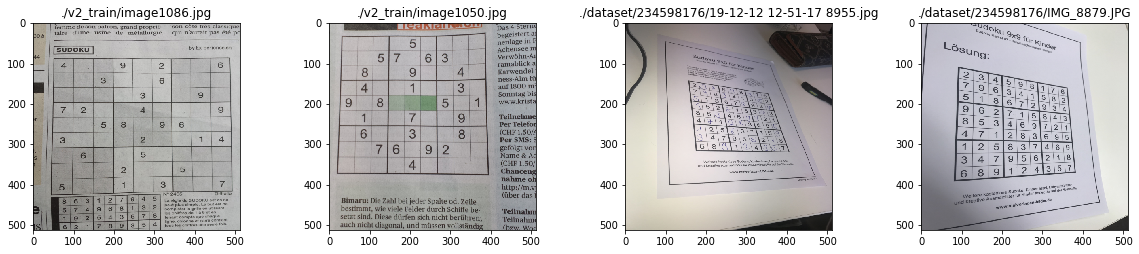

Input digits:
------------------------------------- ------------------------------------- ------------------------------------- -------------------------------------
| 4 |   |   | 9 |   | 2 |   |   | 6 | |   |   |   |   | 5 |   |   |   |   | | 2 | 3 | 4 | 5 | 9 | 8 | 1 | 7 | 6 | | 2 | 3 | 4 | 5 | 9 | 8 | 1 | 7 | 6 |
------------------------------------- ------------------------------------- ------------------------------------- -------------------------------------
|   |   | 3 |   |   | 6 |   |   |   | |   |   | 5 | 7 |   | 6 | 3 |   |   | | 7 | 9 | 6 | 3 | 4 | 1 | 5 | 8 | 2 | | 7 | 9 | 6 | 3 | 4 | 1 | 5 | 8 | 2 |
------------------------------------- ------------------------------------- ------------------------------------- -------------------------------------
|   |   |   |   | 3 |   |   | 9 |   | |   | 8 |   |   | 9 |   |   | 4 |   | | 5 | 1 | 8 | 6 | 7 | 2 | 9 | 3 | 4 | | 5 | 1 | 8 | 6 | 7 | 2 | 9 | 3 | 4 |
------------------------------------- ------------------------------------

In [92]:
subset = test[test["solved_digits"].notnull()].sample(n=4)
show_images(subset["input_image"], subset.index, rows=1, scaling=(4, 4))
print("Input digits:")
print_grids(subset["input_digits"])
print("Recognized digits:")
print_grids(subset["recog_digits"])
print("Solved digits:")
print_grids(subset["solved_digits"])

## Failed to solve

In [95]:
subset = test[test["solved_digits"].isnull()].sample(n=4)
show_images(subset["input_image"], subset.index, rows=1, scaling=(4, 4))
print("Input digits:")
print_grids(subset["input_digits"])
print("Recognized digits:")
print_grids(subset["recog_digits"])
print("Solved digits:")
print_grids(subset["solved_digits"])

ValueError: ignored

## Incorrectly recognized

In [104]:
for filename, actual, recognized in zip(test.index, test["input_digits"], test["recog_digits"]):
  correct = np.all(actual == recognized)
  if correct:
    print("Sudoku '%s' has been correctly recognized!" % filename)
  else:
    print("Sudoku '%s' has been NOT correctly recognized!" % filename)
    print_grids([actual, recognized])

Sudoku './v2_train/image204.jpg' has been correctly recognized!
Sudoku './v2_train/image1003.jpg' has been correctly recognized!
Sudoku './v2_train/image1086.jpg' has been correctly recognized!
Sudoku './v2_train/image1014.jpg' has been correctly recognized!
Sudoku './v2_train/image1078.jpg' has been correctly recognized!
Sudoku './v2_train/image1087.jpg' has been correctly recognized!
Sudoku './v2_train/image1007.jpg' has been correctly recognized!
Sudoku './v2_train/image1050.jpg' has been correctly recognized!
Sudoku './v2_train/image1004.jpg' has been correctly recognized!
Sudoku './dataset/234598176/19-12-12 12-50-59 8951.jpg' has been NOT correctly recognized!
------------------------------------- -------------------------------------
| 2 | 3 | 4 | 5 | 9 | 8 | 1 | 7 | 6 | | 2 | 3 | 6 | 5 | 9 | 8 | 1 | 7 | 6 |
------------------------------------- -------------------------------------
| 7 | 9 | 6 | 3 | 4 | 1 | 5 | 8 | 2 | | 7 | 9 | 6 | 3 | 4 | 1 | 5 | 8 | 2 |
---------------------

# Export

In [105]:
df = dataset[["recog_digits", "solved_digits"]]
df.columns = ["solve_input", "solve_output"]
df

,solve_input,solve_output
input_filename,,
./v2_train/image1059.jpg,"[[0, 3, 0, 1, 4, 8, 2, 0, 0], [0, 4, 2, 0, 0, ...","[[5, 3, 7, 1, 4, 8, 2, 6, 9], [1, 4, 2, 6, 5, ..."
./v2_train/image1006.jpg,"[[0, 9, 5, 8, 0, 0, 0, 0, 0], [2, 0, 0, 3, 0, ...","[[3, 9, 5, 8, 4, 1, 6, 7, 2], [2, 6, 8, 3, 9, ..."
./v2_train/image1082.jpg,"[[3, 4, 7, 0, 5, 1, 0, 0, 0], [0, 1, 9, 0, 0, ...","[[3, 4, 7, 2, 5, 1, 8, 6, 9], [2, 1, 9, 7, 6, ..."
./v2_train/image204.jpg,"[[0, 1, 3, 0, 0, 0, 0, 0, 0], [0, 0, 6, 0, 4, ...","[[4, 1, 3, 6, 5, 8, 2, 9, 7], [5, 7, 6, 9, 4, ..."
./v2_train/image206.jpg,"[[0, 3, 0, 0, 2, 0, 0, 4, 0], [1, 0, 9, 7, 0, ...","[[7, 3, 5, 9, 2, 8, 1, 4, 6], [1, 2, 9, 7, 4, ..."
...,...,...
./dataset/009000800/IMG_8806.JPG,"[[0, 0, 9, 0, 0, 0, 8, 0, 0], [0, 6, 0, 0, 0, ...","[[1, 4, 9, 5, 6, 7, 8, 2, 3], [5, 6, 2, 3, 9, ..."
./dataset/009000800/IMG_8818.JPG,"[[0, 0, 9, 0, 0, 0, 8, 0, 0], [0, 6, 0, 0, 0, ...","[[1, 4, 9, 5, 6, 7, 8, 2, 3], [5, 6, 2, 3, 9, ..."
./dataset/009000800/IMG_8813.JPG,"[[0, 0, 0, 0, 0, 0, 8, 0, 0], [0, 0, 0, 0, 0, ...","[[1, 4, 2, 5, 9, 6, 8, 7, 3], [5, 6, 9, 7, 3, ..."


In [0]:
df.to_pickle("./sudoku_solve_output.bz2")

In [0]:
!cp "./sudoku_solve_output.bz2" "./drive/My Drive/sudoku_solve_output.bz2"